In [0]:
pip install gplearn

     |████████████████████████████████| 51kB 6.1MB/s 


In [0]:
from gplearn.genetic import SymbolicRegressor,SymbolicTransformer,SymbolicClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils.random import check_random_state
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import graphviz
import gc
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
xin1=np.array([[3,1.52,2.04],
[4.11,1.52,3.17],
[4.11,1.9,3.17],
[6.17,1.52,4.54],
[6.17,1.9,3.49],
[5.05,1.52,3.49],
[6.17,3.16,3.49],
[4.11,2.76,3.17]]
)
yin1=np.array([[31.032,31.136],
 [40.24,40.24 ],
 [49.848, 49.848],
 [59.016 ,59.536],
 [66.936 ,67.064],
 [50.12  ,53.096],
 [79.52  ,85.232],
 [56.72  ,56.688]])


xin=np.array([[4.41,1,2.94],
[4.85,1.16,3.75],
[4.99,1.69,3.84],
[4.74,1.93,3.09],
[5.15,1.93,4.42],
[5.67,1.91,4.35],
[4.78,1.36,4.17],
[4.79,1.9,4.18],
[6.13,2.39,4.18]])#z

yin=np.array([[ 61.352  ,61.384],
 [ 79.912  ,79.928],
 [ 94.072 , 93.992],
 [ 80.28   ,77.376],
 [ 92.536 , 92.624],
 [109.176 ,109.176],
 [ 94.408  ,94.416],
 [109.376 ,109.368],
 [123.84  ,123.768]])
xin=(np.vstack([xin1,xin]))
yin=(np.vstack([yin1[:,1].reshape(8,1),yin[:,1].reshape(9,1)]))
#print(xin,yin)

In [0]:
#xin=xin3
#yin=yin3
df=pd.DataFrame(np.hstack([xin,yin]))
df.columns=['L','B1','B5','V']
print(df.shape)
df.insert(3, "L+B1", np.add(xin[:,0],xin[:,1]),True)
df.insert(3, "B5+B1", np.add(xin[:,2],xin[:,1]),True)
df.insert(3, "L+B5", np.add(xin[:,0],xin[:,2]),True)
#df.insert(3, "$L^2$", np.multiply(xin[:,0],xin[:,0]), True) 
#df.insert(3, "$B1^2$", np.multiply(xin[:,1],xin[:,1]), True)
#df.insert(3, "$B5^2$", np.multiply(xin[:,2],xin[:,2]), True)
#df.insert(3, "L*B1", np.multiply(xin[:,0],xin[:,1]), True)
#df.insert(3, "L*B5", np.multiply(xin[:,0],xin[:,2]), True)
#df.insert(3, "B1*B5", np.multiply(xin[:,1],xin[:,2]), True)
#df.insert(3, "$L^3$", np.multiply(xin[:,0],np.multiply(xin[:,0],xin[:,0])), True)
#df.insert(3, "$B1^3$", np.multiply(xin[:,1],np.multiply(xin[:,1],xin[:,1])), True)
df.insert(3, "$B5^3$", np.multiply(xin[:,2],np.multiply(xin[:,2],xin[:,2])), True)
df.insert(3, "L*B1*B5", np.multiply(xin[:,0],np.multiply(xin[:,1],xin[:,2])), True)
df.insert(3, "$L^2$*B5", np.multiply(xin[:,0],np.multiply(xin[:,0],xin[:,2])), True)
#df.insert(3, "$L^2$*B1", np.multiply(xin[:,0],np.multiply(xin[:,0],xin[:,1])), True)
#df.insert(3, "$B1^2$*B5", np.multiply(xin[:,1],np.multiply(xin[:,1],xin[:,2])), True)
#df.insert(3, "$B1^2$*L", np.multiply(xin[:,1],np.multiply(xin[:,1],xin[:,0])), True)
df.insert(3, "$B5^2$*B1", np.multiply(xin[:,2],np.multiply(xin[:,2],xin[:,1])), True)
df.insert(3, "$B5^2$*L", np.multiply(xin[:,2],np.multiply(xin[:,2],xin[:,0])), True)


print(df.shape)
"""
cols_to_fit = [col for col in df.columns]
corr = df[cols_to_fit].corr()
corr = np.array(df[cols_to_fit].corr())
corr= corr[22,:].reshape(1,23)
corr=pd.DataFrame(corr)
print(corr.shape)
plt.figure(figsize=(20,5))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    #ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)
  im=ax=sns.heatmap(
      corr,
      #mask=mask,
      vmin=0,
      vmax=1,
      xticklabels=df.columns.values,
      yticklabels=['V'],
      annot=True,
      linecolor='white',
      linewidths=1,
      #cmap="RdBu",
      cmap="Blues",
      annot_kws={"size": 10},
      square=True,
      cbar_kws={"orientation": "horizontal","fraction":0.15,"pad":0.30,"drawedges":False}
      #cbar=False
  )
plt.show()
#mappable = im.get_children()[0]
#plt.colorbar(mappable,orientation = 'horizontal')

#plt.show()
"""

(17, 4)
(17, 12)


'\ncols_to_fit = [col for col in df.columns]\ncorr = df[cols_to_fit].corr()\ncorr = np.array(df[cols_to_fit].corr())\ncorr= corr[22,:].reshape(1,23)\ncorr=pd.DataFrame(corr)\nprint(corr.shape)\nplt.figure(figsize=(20,5))\n\nmask = np.zeros_like(corr)\nmask[np.triu_indices_from(mask)] = True\nwith sns.axes_style("white"):\n    #ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)\n  im=ax=sns.heatmap(\n      corr,\n      #mask=mask,\n      vmin=0,\n      vmax=1,\n      xticklabels=df.columns.values,\n      yticklabels=[\'V\'],\n      annot=True,\n      linecolor=\'white\',\n      linewidths=1,\n      #cmap="RdBu",\n      cmap="Blues",\n      annot_kws={"size": 10},\n      square=True,\n      cbar_kws={"orientation": "horizontal","fraction":0.15,"pad":0.30,"drawedges":False}\n      #cbar=False\n  )\nplt.show()\n#mappable = im.get_children()[0]\n#plt.colorbar(mappable,orientation = \'horizontal\')\n\n#plt.show()\n'

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.86544166149983, tolerance: 1.0972206983529411
  positive)


Lasso picked 15 variables and eliminated the other 3 variables
Index(['L', 'B1', 'B5', '$B5^2$*L', '$B5^2$*B1', '$L^2$*B5', 'L*B1*B5',
       '$B5^3$', 'L+B5', 'B5+B1', 'L+B1', 'V'],
      dtype='object')
Index([          0,           1,           2,   'log(B5)',   'log(B1)',
          'log(L)',   'tan(B5)',   'tan(B1)',    'tan(L)',    'cos(L)',
          'sin(L)',   'cos(B5)',   'cos(B1)',   'sin(B5)',   'sin(B1)',
        '(B1)/(L)',  '(B5)/(L)', '(B5)/(B1)', '(B1)/(B5)',  '(L)/(B1)',
        '(L)/(B5)',           3],
      dtype='object')


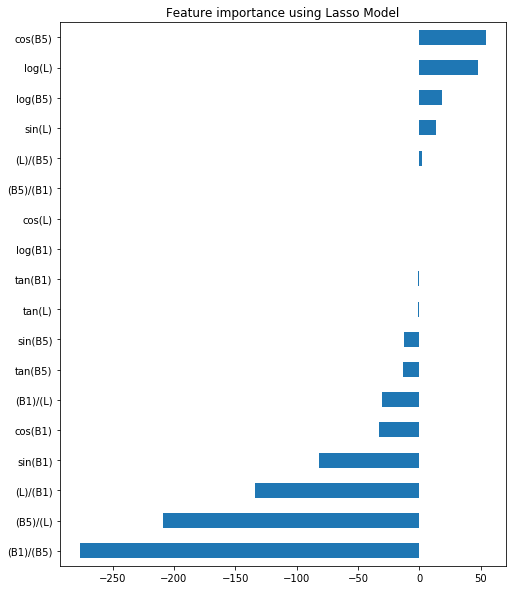

In [0]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=2,normalize=True)
df1=pd.DataFrame(np.hstack([xin,yin]))
df1.insert(3, "(L)/(B5)", np.divide(xin[:,0],xin[:,1]), True)
df1.insert(3, "(L)/(B1)", np.divide(xin[:,0],xin[:,2]), True)
df1.insert(3, "(B1)/(B5)", np.divide(xin[:,1],xin[:,2]), True)
df1.insert(3, "(B5)/(B1)", np.divide(xin[:,1],xin[:,0]), True)
df1.insert(3, "(B5)/(L)", np.divide(xin[:,2],xin[:,0]), True)
df1.insert(3, "(B1)/(L)", np.divide(xin[:,2],xin[:,1]), True)

df1.insert(3, "sin(B1)", np.sin(xin[:,1]), True) 
df1.insert(3, "sin(B5)", np.sin(xin[:,2]), True)
df1.insert(3, "cos(B1)", np.cos(xin[:,1]), True)
df1.insert(3, "cos(B5)", np.cos(xin[:,2]), True)
df1.insert(3, "sin(L)", np.sin(xin[:,0]), True)
df1.insert(3, "cos(L)", np.cos(xin[:,0]), True)
df1.insert(3, "tan(L)", np.tan(xin[:,0]), True)
df1.insert(3, "tan(B1)", np.tan(xin[:,1]), True)
df1.insert(3, "tan(B5)", np.tan(xin[:,2]), True)

df1.insert(3, "log(L)", np.log10(xin[:,0]), True)
df1.insert(3, "log(B1)", np.log10(xin[:,1]), True)
df1.insert(3, "log(B5)", np.log10(xin[:,2]), True)
"""
df1.insert(3, "$L^3$", np.multiply(xin[:,0],np.multiply(xin[:,0],xin[:,0])), True)
df1.insert(3, "$B1^3$", np.multiply(xin[:,1],np.multiply(xin[:,1],xin[:,1])), True)
df1.insert(3, "$B5^3$", np.multiply(xin[:,2],np.multiply(xin[:,2],xin[:,2])), True)
df1.insert(3, "L*B1*B5", np.multiply(xin[:,0],np.multiply(xin[:,1],xin[:,2])), True)
df1.insert(3, "$L^2$*B5", np.multiply(xin[:,0],np.multiply(xin[:,0],xin[:,2])), True)
df1.insert(3, "$L^2$*B1", np.multiply(xin[:,0],np.multiply(xin[:,0],xin[:,1])), True)
df1.insert(3, "$B1^2$*B5", np.multiply(xin[:,1],np.multiply(xin[:,1],xin[:,2])), True)
df1.insert(3, "$B1^2$*L", np.multiply(xin[:,1],np.multiply(xin[:,1],xin[:,0])), True)
df1.insert(3, "$B5^2$*B1", np.multiply(xin[:,2],np.multiply(xin[:,2],xin[:,1])), True)
df1.insert(3, "$B5^2$*L", np.multiply(xin[:,2],np.multiply(xin[:,2],xin[:,0])), True)
"""
reg.fit(df1.iloc[:,3:df1.shape[1]-1], df1.iloc[:,df1.shape[1]-1])
#print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
#print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = df1.iloc[:,3:df1.shape[1]-1].columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
print(df.columns)
print(df1.columns)

In [0]:
fin=xin
fout=yin
#print(fin)
#print(df.iloc[:,13:19])
fin=np.hstack([fin,df.iloc[:,3:13],df1.iloc[:,3:21]])
#print(fin)
est_gp = SymbolicTransformer(population_size=5000,
                           generations=15, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,const_range=(-10.,10.),
                           parsimony_coefficient=0.01, random_state=0,
                           function_set=('mul','add','div','sub'),
                           warm_start=True,
                           init_depth=(2,6),init_method='half and half',
                           n_components=5
                          )
est_gp.fit(fin, fout.reshape(fout.shape[0],))
print(est_gp)
#The second term of the equation has been generated correctly


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    25.87         0.385318        3         0.910319                1     47.18s
[add(X3, X25),
 sub(X10, mul(X30, X17)),
 div(mul(X4, X4), sub(9.647, X25)),
 sub(div(sub(X24, X23), div(X27, X25)), mul(mul(X13, X1), sub(X10, X6))),
 div(X17, add(X22, X6))]


In [0]:
fin=xin
fout=yin
#print(fin)
#print(df.iloc[:,13:19])
fin=np.hstack([fin,df.iloc[:,3:13]])
#print(fin)
est_gp = SymbolicTransformer(population_size=5000,
                           generations=15, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,const_range=(-10.,10.),
                           parsimony_coefficient=0.01, random_state=0,
                           function_set=('mul','add','div','sub'),
                           warm_start=True,
                           init_depth=(2,6),init_method='half and half',
                           n_components=5
                          )
est_gp.fit(fin, fout.reshape(fout.shape[0],))
print(est_gp)
#The second term of the equation has been generated correctly


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    26.58         0.433829        3         0.914192                1     47.47s
[div(X3, -5.163),
 mul(X8, X4),
 add(add(div(div(add(X6, X5), div(X3, X11)), mul(div(-8.788, X11), mul(X11, X7))), add(div(div(X11, 6.429), add(X12, X8)), div(add(X7, X10), div(-5.187, X3)))), sub(div(add(mul(X8, X3), mul(X1, X10)), div(div(X6, X4), add(X3, X8))), add(add(add(X9, X6), add(-7.118, X12)), div(sub(X5, X0), mul(X3, X11))))),
 add(X1, X2),
 mul(div(sub(X6, X9), add(X9, X1)), mul(div(X2, X7), add(X5, X1)))]


In [0]:
fin=xin
fout=yin
#print(fin)
#print(df.iloc[:,13:19])
fin=np.hstack([fin,df.iloc[:,3:13],df1.iloc[:,3:21]])
#print(fin)
est_gp = SymbolicTransformer(population_size=5000,
                           generations=15, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,const_range=(-10.,10.),
                           parsimony_coefficient=0.01, random_state=0,
                           function_set=('mul','add','div','sub','sin','cos','tan'),
                           warm_start=True,
                           init_depth=(2,6),init_method='full',
                           n_components=5
                          )
est_gp.fit(fin, fout.reshape(fout.shape[0],))
print(est_gp)
#The second term of the equation has been generated correctly


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    19.09         0.280045        6         0.882028                1     40.05s
[sub(mul(X0, X23), tan(X26)),
 cos(div(cos(tan(X17)), sin(div(X22, X14)))),
 sin(div(add(add(tan(add(X16, X11)), sub(sin(X4), sin(X16))), cos(cos(tan(X1)))), tan(cos(sin(mul(X14, X11)))))),
 add(sub(mul(X28, 0.098), add(X18, X17)), mul(tan(X19), sub(X5, X19))),
 mul(cos(sin(sub(cos(add(X11, X5)), sin(sin(X4))))), cos(sub(add(sub(cos(-0.767), cos(X17)), sub(div(X15, X30), mul(X15, X19))), add(div(add(X9, X2), sub(X27, X20)), sub(sin(X26), add(X2, X27))))))]


In [0]:
fin=xin
fout=yin
#print(fin)
#print(df.iloc[:,13:19])
fin=np.hstack([fin,df.iloc[:,3:13]])
#print(fin)
est_gp = SymbolicTransformer(population_size=5000,
                           generations=15, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,const_range=(-10.,10.),
                           parsimony_coefficient=0.01, random_state=0,
                           function_set=('mul','add','div','sub','sin','cos','tan'),
                           warm_start=True,
                           init_depth=(2,6),init_method='full',
                           n_components=5
                          )
est_gp.fit(fin, fout.reshape(fout.shape[0],))
print(est_gp)
#The second term of the equation has been generated correctly


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    19.09         0.270577       11         0.880245                1     41.10s
[sub(tan(tan(X4)), div(sub(-0.833, X10), div(X0, X8))),
 sin(tan(X2)),
 mul(cos(tan(sub(mul(-4.490, X0), cos(X3)))), add(mul(sin(add(X1, X10)), mul(cos(X9), div(X0, -1.874))), sub(sub(add(X4, 7.115), sin(X10)), tan(sub(X11, X12))))),
 sub(add(sub(cos(tan(sin(X5))), div(cos(tan(X0)), mul(div(-0.020, X11), add(X0, X10)))), sub(tan(sub(div(X0, X1), sin(X8))), add(cos(div(7.021, X3)), sin(cos(X1))))), add(tan(add(tan(div(X0, X0)), cos(div(X7, X2)))), mul(mul(mul(cos(X3), sub(X8, X0)), tan(sin(X9))), sin(sin(add(X9, X4)))))),
 div(div(sin(cos(X0)), add(mul(X0, X1), cos(X1))), sub(tan(mul(-4.364, X8)), add(tan(X2), div(7.063, X12))))]


In [0]:

##All parameters
reg_gp = SymbolicRegressor(population_size=5000,
                           generations=50, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,const_range=(-10.,10.),
                           parsimony_coefficient=0.01, random_state=0,
                           function_set=('mul','add','sub','div'),
                           warm_start=False,
                           init_depth=(2,8),init_method='half and half'

                          )
fin=xin
fout=yin
#print(fin)
#print(df.iloc[:,13:19])
fin=np.hstack([fin,df.iloc[:,3:13],df1.iloc[:,3:21]])
reg_gp.fit(fin,fout.reshape(fout.shape[0],))
print(reg_gp._program)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    75.23      7.20375e+21       31          10.8293          20.0204      4.37m
   1     6.45      1.07121e+08       31          8.97987           34.883      1.67m
   2     7.82          178.966       31          8.53708          36.2554      1.61m
   3    12.88      5.63619e+07       31          8.46992          42.1025      1.79m
   4    21.27          181.854       31          8.46992          42.1025      2.21m
   5    26.83           293175       31          7.29287          36.0861      2.28m
   6    30.93      1.47011e+07       31          8.20677          27.5621      2.46m
   7    33.44           1192.8       37          6.71753          19.7903      2.42m
   8    35.28      3.27657e+10       41          6.56151          3.99794  

In [0]:
##Only cubic
reg_gp1 = SymbolicRegressor(population_size=5000,
                           generations=50, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,const_range=(-10.,10.),
                           parsimony_coefficient=0.01, random_state=0,
                           function_set=('mul','add','sub','div'),
                           warm_start=False,
                           init_depth=(2,8),init_method='half and half'

                          )
fin=xin
fout=yin
#print(fin)
#print(df.iloc[:,13:19])
fin=np.hstack([fin,df.iloc[:,3:13]])
reg_gp1.fit(fin,fout.reshape(fout.shape[0],))
print(reg_gp1._program)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    76.02      1.17539e+36        3          11.1825          41.5123      4.60m
   1     6.08       2.3234e+12        3          9.60148          48.4012      1.63m
   2     5.31      1.43402e+15        5          9.55707          46.6564      1.73m
   3     4.56           2295.7        5          9.13295          49.8778      1.45m
   4     4.47      3.89446e+07        5          9.18842          49.4213      1.43m
   5     4.55           162861       17           9.2191          50.0293      1.59m
   6     4.29          19969.4        5          9.13704          49.8778      1.36m
   7     4.30      1.31751e+06        5          9.21676          49.2087      1.31m
   8     4.38          45135.9        5          9.25927          48.9304  

In [0]:
##Only cubic
reg_gp2 = SymbolicRegressor(population_size=5000,
                           generations=50, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,const_range=(-10.,10.),
                           parsimony_coefficient=0.01, random_state=0,
                           function_set=('mul','add','sub','div','sin','cos','tan'),
                           warm_start=False,
                           init_depth=(2,8),init_method='half and half'

                          )
fin=xin
fout=yin
#print(fin)
#print(df.iloc[:,13:19])
fin=np.hstack([fin,df.iloc[:,3:13]])
reg_gp2.fit(fin,fout.reshape(fout.shape[0],))
print(reg_gp2._program)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    20.92      9.26197e+06       11          11.5567          46.2521      1.90m
   1     8.08          211.961        3          9.60148          48.4012      1.64m
   2     5.82           443997        6          9.47353          47.9605      1.76m
   3     5.26          14342.6        3          9.60148          48.4012      1.41m
   4     4.82          452.896        6          8.32101          47.4898      1.36m
   5     4.49          5675.57        7          9.17288           51.765      1.32m
   6     4.35           339.41        8          8.66766          36.5999      1.55m
   7     4.40          33199.2        6          9.17083            48.93      1.25m
   8     4.44          210.865        6          8.29373          47.6944  

In [0]:

##All parameters
reg_gp3 = SymbolicRegressor(population_size=5000,
                           generations=50, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,const_range=(-10.,10.),
                           parsimony_coefficient=0.01, random_state=0,
                           function_set=('mul','add','sub','div','sin','cos','tan'),
                           warm_start=False,
                           init_depth=(2,8),init_method='half and half'

                          )
fin=xin
fout=yin
#print(fin)
#print(df.iloc[:,13:19])
fin=np.hstack([fin,df.iloc[:,3:13],df1.iloc[:,3:21]])
reg_gp3.fit(fin,fout.reshape(fout.shape[0],))
print(reg_gp3._program)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    20.31           6968.1        3          13.0158           40.667      1.84m
   1     8.26          110.061        9          12.1375          30.5494      1.63m
   2     4.79          84.7555        3          9.65157          47.1113      1.41m
   3     3.96           83.632        3          9.65157          47.1113      1.71m
   4     3.93          46.4609        7          8.97768          49.6771      1.30m
   5     4.19          40.8316        4          9.25666          44.5528      1.28m
   6     4.21          618.858        6          7.21581          49.9792      1.27m
   7     4.36           39.445        6          8.03245          43.8544      1.23m
   8     4.50          43.2471        6          7.61797           46.963  

In [0]:

##All parameters
reg_gp4 = SymbolicRegressor(population_size=10000,
                           generations=50, stopping_criteria=0.01,
                           p_crossover=0.9, p_subtree_mutation=0.01,
                           p_hoist_mutation=0.05, p_point_mutation=0.01,
                           max_samples=0.9, verbose=1,const_range=(-10.,10.),
                           parsimony_coefficient=0.01, random_state=0,
                           function_set=('mul','add','sub','div','inv','sqrt'),
                           warm_start=True,
                           init_depth=(2,10),init_method='half and half'

                          )
fin=xin
fout=yin
#print(fin)
#print(df.iloc[:,13:19])
fin=np.hstack([fin,df.iloc[:,3:13],df1.iloc[:,15:21]])
reg_gp4.fit(fin,fout.reshape(fout.shape[0],))
print(reg_gp4._program)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    58.24      4.35133e+12        3          9.53633          47.7142      8.41m
   1    20.35           196045        3          9.60148          48.4012      4.58m
   2     7.97          34642.4        5          9.45848          49.8407      3.68m
   3     5.22          65.4031        3          9.24785          49.8778      2.86m
   4     4.94          49.8094        5          9.17288           51.765      2.80m
   5     4.57          4747.68        7          9.24726          49.7532      3.16m
   6     4.12          34.0865       13          9.18875          49.7925      2.59m
   7     3.96          30.9204        5          9.17288           51.765      2.57m
   8     3.74           26.923        5          9.19139          49.7974  

In [0]:

##All parameters
reg_gp = SymbolicRegressor(population_size=5000,
                           generations=50, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,const_range=(-10.,10.),
                           parsimony_coefficient=0.01, random_state=0,
                           function_set=('mul','add','sub','div'),
                           warm_start=False,
                           init_depth=(2,8),init_method='half and half'

                          )
fin=xin
fout=yin
#print(fin)
#print(df.iloc[:,13:19])
fin=np.hstack([fin,df.iloc[:,3:11],df1.iloc[:,15:21]])
reg_gp.fit(fin,fout.reshape(fout.shape[0],))
print(reg_gp._program)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    75.66      9.86452e+26        3           10.436          47.1316      4.63m
   1     8.26          2613.22        5          9.91574          49.1705      1.80m
   2     5.77          6372.83        5          9.27994          49.5019      1.54m
   3     5.74      9.04871e+07        7          9.26593          49.9739      1.60m
   4     5.47      3.91515e+07       15          9.22194          50.1512      1.48m
   5     5.43          81924.3        7          9.25698          49.7099      1.55m
   6     5.41          23520.5        5           9.1278          50.5707      1.44m
   7     5.30          13407.9        7          9.24089          50.1173      1.47m
   8     5.40      3.19916e+06        5          9.23332          50.2636  

In [0]:

##All parameters
reg_gp6 = SymbolicRegressor(population_size=5000,
                           generations=50, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,const_range=(-10.,10.),
                           parsimony_coefficient=0.01, random_state=0,
                           function_set=('mul','add','sub','div','sin','cos','tan'),
                           warm_start=False,
                           init_depth=(2,8),init_method='half and half'

                          )
fin=xin
fout=yin
#print(fin)
#print(df.iloc[:,13:19])
fin=np.hstack([fin,df.iloc[:,3:11],np.array(df1.iloc[:,5]).reshape(17,1),df1.iloc[:,11:13],df1.iloc[:,14:21]])
reg_gp6.fit(fin,fout.reshape(fout.shape[0],))
print(reg_gp6._program)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    20.55           9072.7        3          13.3705          39.4259      1.86m
   1     7.32          131.468        5          11.4656          51.0585      1.58m
   2     4.70          85.8604        7            9.289          49.8137      1.64m
   3     4.75          49.6105        5          9.72507          47.4387      1.39m
   4     4.81          101.198        5          9.28771          50.1262      1.36m
   5     4.87          86.2403        6          9.42324          50.6028      1.34m
   6     5.00          56.4193        5          9.28771          50.1262      1.52m
   7     5.13           53.994        8          8.28347          42.7282      1.28m
   8     5.21             51.2       10          7.77682          44.9326  

In [0]:
print(df.columns)
print(df1.columns)

Index(['L', 'B1', 'B5', '$B5^2$*L', '$B5^2$*B1', '$L^2$*B5', 'L*B1*B5',
       '$B5^3$', 'L+B5', 'B5+B1', 'L+B1', 'V'],
      dtype='object')
Index([          0,           1,           2,   'log(B5)',   'log(B1)',
          'log(L)',   'tan(B5)',   'tan(B1)',    'tan(L)',    'cos(L)',
          'sin(L)',   'cos(B5)',   'cos(B1)',   'sin(B5)',   'sin(B1)',
       '(B5)/(B1)',  '(B5)/(L)',  '(B1)/(L)', '(B1)/(B5)',  '(L)/(B5)',
        '(L)/(B1)',           3],
      dtype='object')


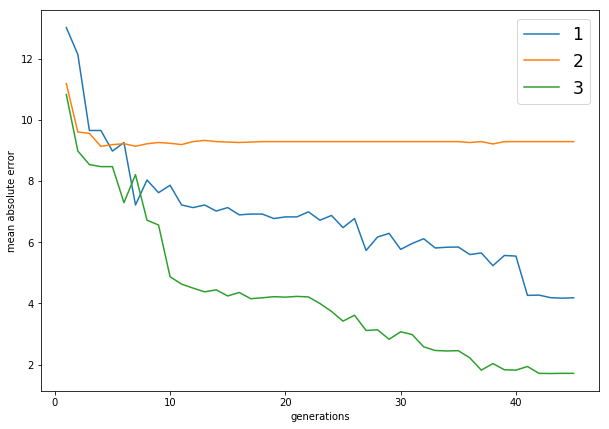

In [0]:
v1=np.array([10.8293,8.97987,8.53708,8.46992,8.46992,7.29287,8.20677,6.71753,6.56151,4.87026,4.62802,
4.49749,4.37558,4.44168,4.24252,4.3548,4.1522,4.18138,4.21776,
4.20264,4.22808,4.20972,3.99448,3.73724,3.41891,3.61163,3.11257,3.13427,2.82496,3.07049,2.98023,2.57814,2.4597,2.44337,2.45282,
2.21796,1.81636,2.03167,1.82838,1.81636,1.93609,1.71153,1.70659,1.71153,1.71153,1.51282,1.52817,1.51282,1.70649,1.55527])
v2=np.array([11.1825,9.60148,9.55707,9.13295,9.18842,9.2191,9.13704,9.21676,9.25927,9.2324,9.19115,9.28771,9.3269,9.28771,9.27387,9.25927,
9.27387,9.28771,9.28771,9.28771,9.28771,9.28771,9.28771,9.28771,9.28771,9.28771,9.28771,9.28771,9.28771,9.28771,9.28771,9.28771,
9.28771,9.28771,9.28771,9.25762,9.28771,9.21135,9.28771,9.28771,9.28771,9.28771,9.28771,9.28771,9.28771,9.28771,9.28771,9.28771,9.28771,9.25803])
v3=np.array([11.5567,9.60148,9.47353,9.60148,8.32101,9.17288,8.66766,9.17083,8.29373,8.30593,7.09392,6.93055,7.038,7.09392,6.91331,6.49681,
6.11419,5.41416,5.07923,5.21745,5.00682,5.07923,4.51786,3.765,3.74188,3.23468,3.23468,3.17711,3.08166,2.99886,2.79602,2.44828,
2.90672,2.38129,2.82999,2.69283,2.47968,2.86909,2.977,2.83276,2.95966,2.62639,2.51472,2.47968,2.60745,2.47661,2.13546,2.13546,2.11289,2.11902])
v4=np.array([13.0158,12.1375,9.65157,9.65157,8.97768,9.25666,7.21581,8.03245,7.61797,7.86066,7.21581,7.13081,7.21581,7.01701,7.13081,6.89288,
6.91934,6.91934,6.77218,6.82639,6.82639,6.99199,6.71781,6.87326,6.47658,6.77263,5.72855,6.16999,6.28693,5.76528,5.95705,6.11293,
5.81035,5.83477,5.84217,5.59554,5.64805,5.23204,5.56561,5.54452,4.26025,4.26999,4.18619,4.16904,4.18254,3.90359,3.79339,3.71933,3.53034,3.40514])
v5=np.array([9.53633,
9.60148,
9.45848,
9.24785,
9.17288,
9.24726,
9.18875,
9.17288,
9.19139,
9.17288,
9.19139,
9.19139,
9.14417,
9.17288,
9.17904,
9.14417,
9.16187,
9.19139,
9.17904,
9.1711,
9.14417,
9.14417,
9.14417,
9.12965,
9.14417,
9.14417,
9.14417,
9.11824,
9.11824,
9.11096,
9.11096,
9.12965,
9.11096,
9.12965,
9.11096,
9.14417,
9.12965,
9.11824,
9.11824,
9.11096,
9.11824,
9.11096,
9.11096,
9.11096,
9.12965,
9.11096,
9.11096,
9.11096,
9.10876,
9.11096
            ])
x11=np.arange(1,46)
plt.figure(figsize=(10,7))
plt.plot(x11,v4[0:45])
plt.plot(x11,v2[0:45])
plt.plot(x11,v1[0:45])

#plt.plot(x11,v3)

#plt.plot(x11,v5)
plt.xlabel('generations')
plt.ylabel('mean absolute error')
plt.legend(['1', '2','3'], loc='upper right',fontsize='xx-large')

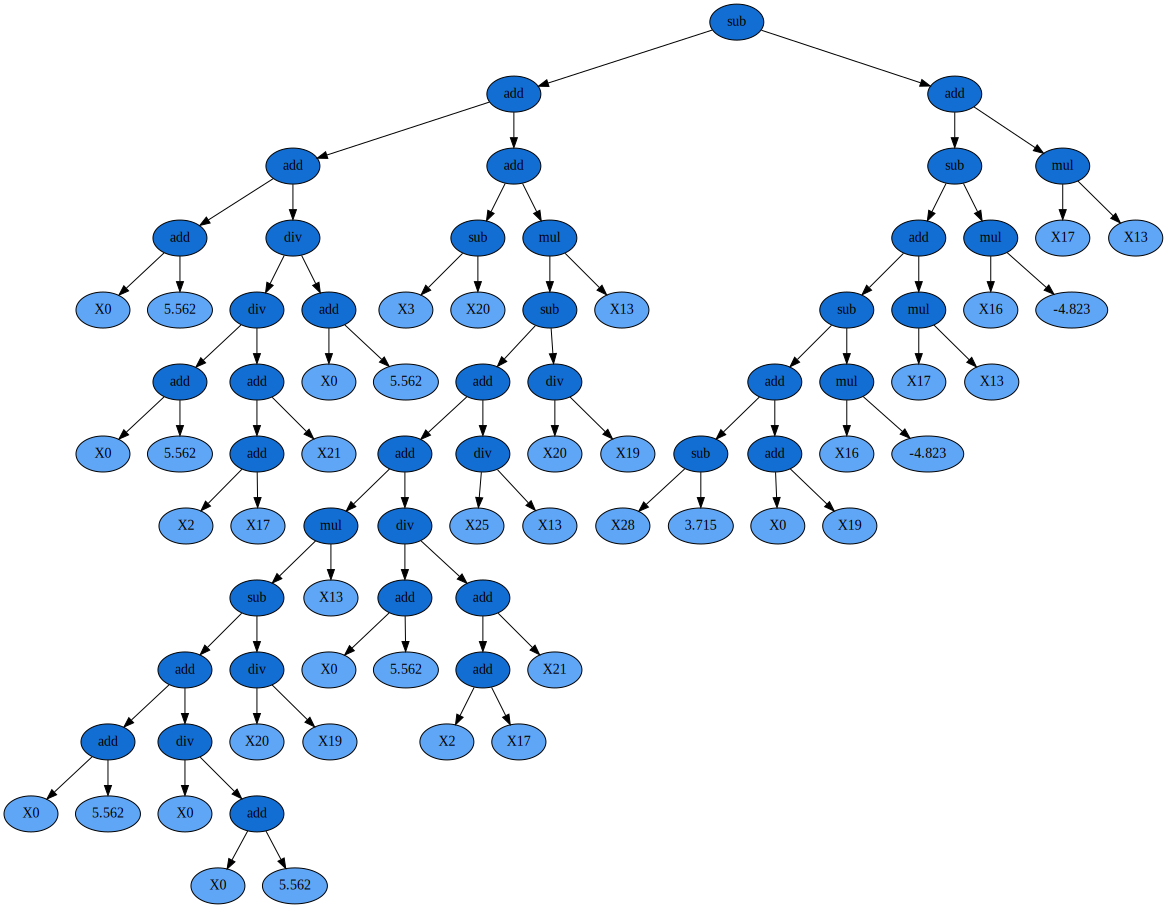

In [0]:
#Tree of the equation (2nd equation)
dot_data = reg_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph


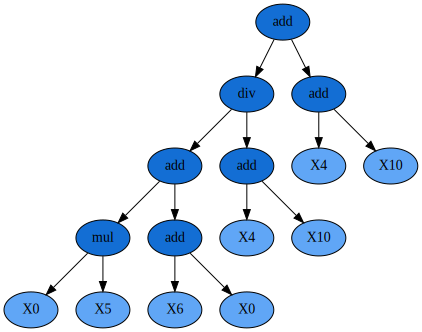

In [0]:
#Tree of the equation (2nd equation)
dot_data = reg_gp1._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph


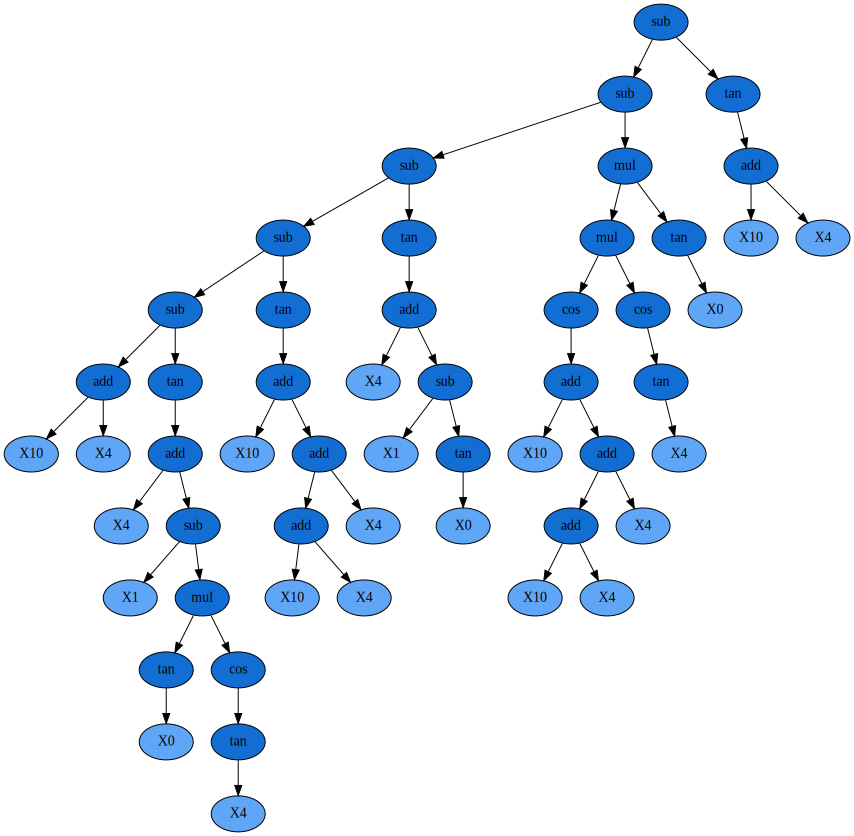

In [0]:
#Tree of the equation (2nd equation)
dot_data = reg_gp2._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph


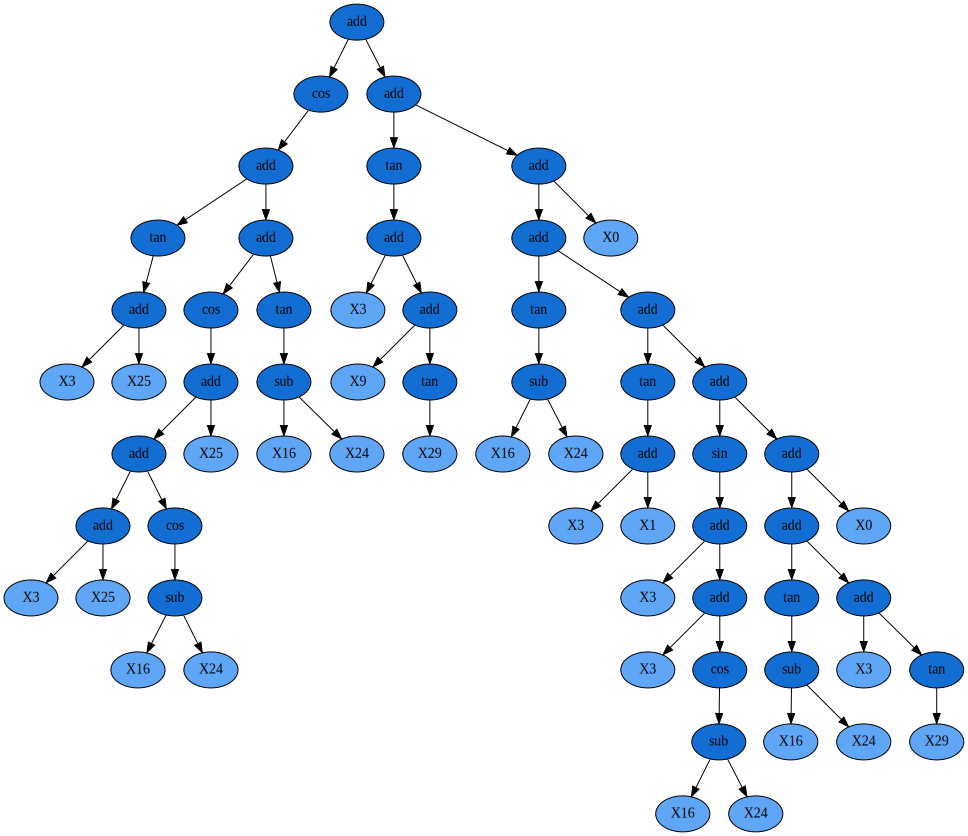

In [0]:
#Tree of the equation (2nd equation)
dot_data = reg_gp3._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph


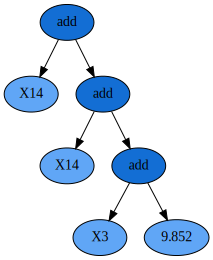

In [0]:
#Tree of the equation (2nd equation)
dot_data = reg_gp4._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph


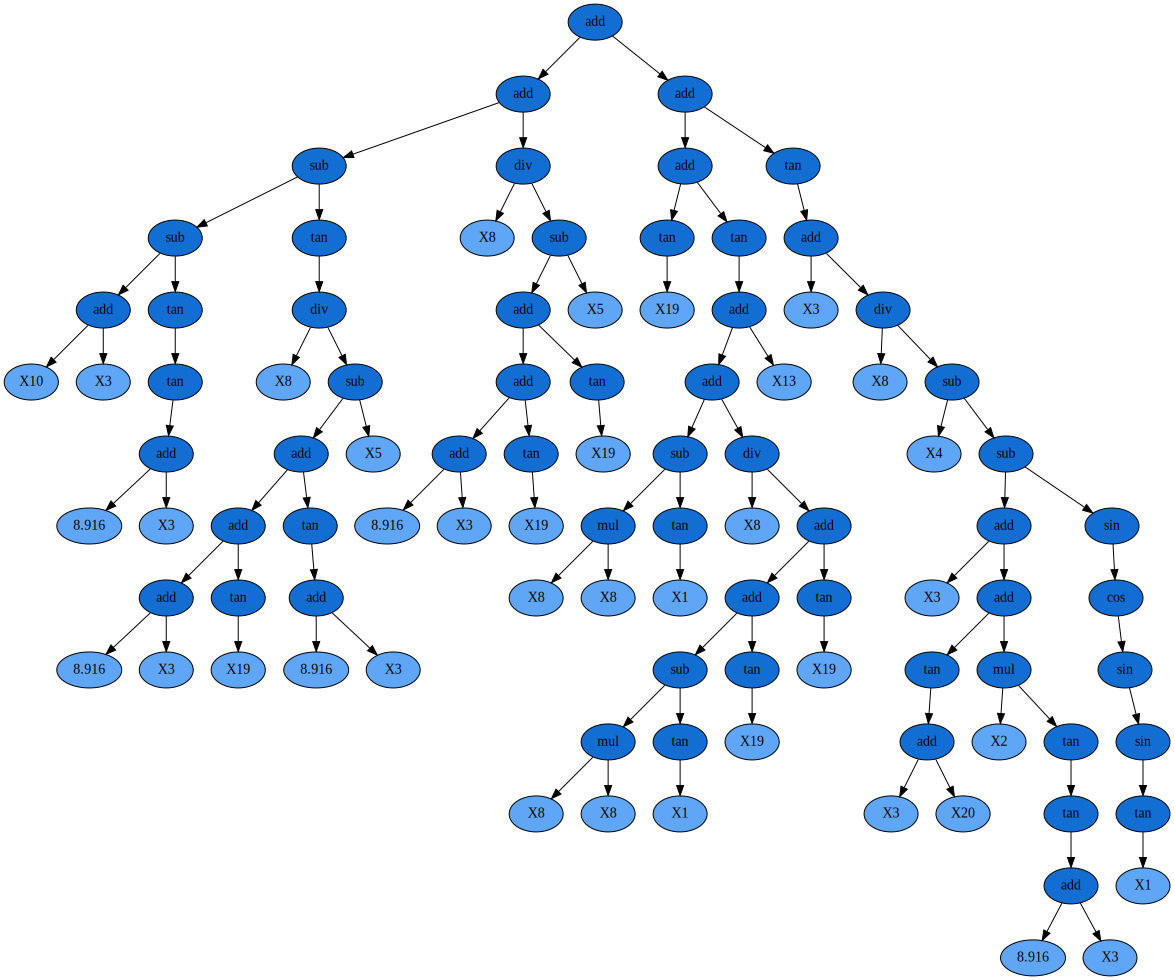

In [0]:
#Tree of the equation (2nd equation)
dot_data = reg_gp6._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph
